# TPP10

Author: Shangfei Wang | Date: 10/10/2022

In this TPP, I will continue to complete sub-questions. My sub-question is "Is weekly steps predictable?". From this, I will predict the second half of the data from the first half of the data that has been obtained so far. And compare the predicted value with the actual value.

## Import packages and Read Data

Below are the packages that need to be used. 'datetime' is used to aid in the analysis of time data.

In [1]:
# Date started: 10/10/2022

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Read the required data from github.

In [2]:
# Date started: 02/10/2022

# df = pd.read_csv("resources/Participant-07.csv")
df = pd.read_csv('https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-07.csv?token=GHSAT0AAAAAAAAAHGL37VAX3V3S56I6ITZSY2OIXMA')

## Data clean

First, split the date and time to facilitate subsequent analysis of the date.

In [3]:
# Date started: 10/10/2022

df['Date'] = df['Start'].map(lambda x:x.split(' ')[0])  # Split to get 'Date' column
df['Time'] = df['Start'].map(lambda x:x.split(' ')[1])  # Split to get 'Time' column
df


,Start,Finish,Steps (count),Date,Time
0,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0,01-Jan-2022,00:00
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0,01-Jan-2022,01:00
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0,01-Jan-2022,02:00
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0,01-Jan-2022,03:00
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0,01-Jan-2022,04:00
...,...,...,...,...,...
6128,13-Sep-2022 07:00,13-Sep-2022 08:00,798.0,13-Sep-2022,07:00
6129,13-Sep-2022 08:00,13-Sep-2022 09:00,139.0,13-Sep-2022,08:00
6130,13-Sep-2022 09:00,13-Sep-2022 10:00,392.0,13-Sep-2022,09:00
6131,13-Sep-2022 10:00,13-Sep-2022 11:00,328.0,13-Sep-2022,10:00


Replace index and set date as index.

In [4]:
# Date started: 10/10/2022

df['date'] = pd.to_datetime(df['Date'])
df.set_index("date", inplace=True) # change index

df

,Start,Finish,Steps (count),Date,Time
date,,,,,
2022-01-01,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0,01-Jan-2022,00:00
2022-01-01,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0,01-Jan-2022,01:00
2022-01-01,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0,01-Jan-2022,02:00
2022-01-01,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0,01-Jan-2022,03:00
2022-01-01,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0,01-Jan-2022,04:00
...,...,...,...,...,...
2022-09-13,13-Sep-2022 07:00,13-Sep-2022 08:00,798.0,13-Sep-2022,07:00
2022-09-13,13-Sep-2022 08:00,13-Sep-2022 09:00,139.0,13-Sep-2022,08:00
2022-09-13,13-Sep-2022 09:00,13-Sep-2022 10:00,392.0,13-Sep-2022,09:00


Setting the date as index is to consolidate the data for a week. This matches the time frequency of advanced driving problems.

The data is aggregated by running resample('w').sum() . The data is consolidated from daily recorded steps into weekly steps.

Resample in Pandas, resampling, is a method of reprocessing the original sample, and it is a convenient method for resampling and frequency conversion of regular time series data.

In [5]:
# Date started: 10/10/2022

print(df.resample('w').sum()) # 'w' stands for weeks.


            Steps (count)
date                     
2022-01-02   14793.000000
2022-01-09   48008.000000
2022-01-16   45772.000000
2022-01-23   64605.000000
2022-01-30   52127.000000
2022-02-06   52774.000000
2022-02-13   57186.000000
2022-02-20   66588.000000
2022-02-27   47431.000000
2022-03-06   51290.000000
2022-03-13   53692.000000
2022-03-20   56876.000000
2022-03-27   67035.000000
2022-04-03   54921.000000
2022-04-10   59287.000000
2022-04-17   61964.000000
2022-04-24   57233.000000
2022-05-01   27315.000000
2022-05-08   52958.000000
2022-05-15   55363.000000
2022-05-22   49862.000000
2022-05-29   57916.000000
2022-06-05   52693.000000
2022-06-12   52088.000000
2022-06-19   46413.000000
2022-06-26   44977.000000
2022-07-03   59186.000000
2022-07-10   42272.000000
2022-07-17   54614.000000
2022-07-24   52900.000000
2022-07-31   61342.000000
2022-08-07   62321.035842
2022-08-14   56904.619988
2022-08-21   59816.314867
2022-08-28   54708.578491
2022-09-04   50079.131636
2022-09-11  

## New content starting at week10

Forecasting in days is more accurate. So I will temporarily convert the time unit in weeks to the time unit in days.

In [6]:
# Date started: 10/10/2022

new_df = df.resample('d').sum()
# new_df.rename({'Steps (count)': 'StepCount'}, axis=1, inplace=True)

new_df.head(10)

,Steps (count)
date,
2022-01-01,6758.0
2022-01-02,8035.0
2022-01-03,7241.0
2022-01-04,5955.0
2022-01-05,11107.0
2022-01-06,3271.0
2022-01-07,7797.0
2022-01-08,8673.0
2022-01-09,3964.0


The above is the number of steps counted in days.

Now we will create a rolling average using pandas.datafframe.rolling with a window size of 10.

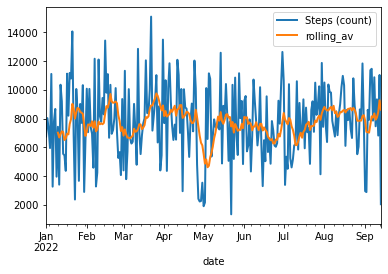

In [7]:
# Date started: 10/10/2022

new_df['rolling_av'] = new_df['Steps (count)'].rolling(10).mean()
# take a look
new_df[['Steps (count)','rolling_av']].plot(lw=2);

The chart above shows the trend of daily steps and the average rolling trend.

Below is the model to use for prediction, I will use the ARIMA model for my subproblem.

In [10]:
# Date started: 10/10/2022

from statsmodels.tsa.arima.model import ARIMA   #Add new packages that need to be used
ARMA_model = ARIMA(endog=new_df['Steps (count)'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          Steps (count)   No. Observations:                  256
Model:                ARIMA(0, 0, 10)   Log Likelihood               -2369.055
Date:                Tue, 11 Oct 2022   AIC                           4762.110
Time:                        21:10:13   BIC                           4804.652
Sample:                    01-01-2022   HQIC                          4779.221
                         - 09-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7748.4435    150.675     51.425      0.000    7453.126    8043.761
ma.L1          0.0754      0.143      0.527      0.598      -0.205       0.356
ma.L2          0.0446      0.129      0.346      0.7

E:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Some basic data can be obtained through the calculation of the model. The figure above shows this data.

According to the timeline provided by the dataset, I divided the forecast part into 2022-06-01 to 2022-09-18.

In [12]:
# Date started: 10/10/2022

start_date = '2022-06-01'
end_date   = '2022-09-18'
new_df['forecast'] = results.predict(start=start_date, end=end_date)  # Forecast for the selected date range.

In [13]:
# Date started: 10/10/2022

a = new_df[['Steps (count)','rolling_av','forecast']]
a

,Steps (count),rolling_av,forecast
date,,,
2022-01-01,6758.000000,NaN,NaN
2022-01-02,8035.000000,NaN,NaN
2022-01-03,7241.000000,NaN,NaN
2022-01-04,5955.000000,NaN,NaN
2022-01-05,11107.000000,NaN,NaN
...,...,...,...
2022-09-09,7468.884447,7926.751958,7343.318951
2022-09-10,9341.000000,8076.308212,9401.872726
2022-09-11,6823.000000,8462.908212,7379.367020


The table above is a forecast by date.

Since our high level driving problem is in weeks, here I will reconvert the time units to weeks.

In [14]:
# Date started: 10/10/2022

pre_df = a.resample('w').sum()
pre_df

,Steps (count),rolling_av,forecast
date,,,
2022-01-02,14793.000000,0.000000,0.000000
2022-01-09,48008.000000,0.000000,0.000000
2022-01-16,45772.000000,47958.000000,0.000000
2022-01-23,64605.000000,55158.400000,0.000000
2022-01-30,52127.000000,58633.300000,0.000000
2022-02-06,52774.000000,51775.900000,0.000000
2022-02-13,57186.000000,52857.300000,0.000000
2022-02-20,66588.000000,61701.900000,0.000000
2022-02-27,47431.000000,59727.100000,0.000000


The figure below shows a discounted comparison of the actual number of steps and the predicted number of steps.

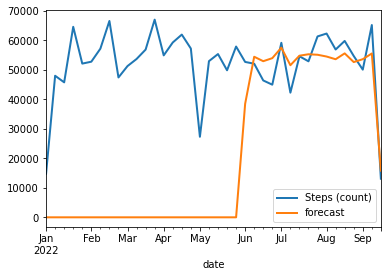

In [15]:
# Date started: 10/10/2022

pre_df[['Steps (count)','forecast']].plot(lw=2);

From this figure, it can be found that there is still a certain difference between the number of steps predicted in the first few months and the actual number of steps in the next few months. This shows that people's activities may vary greatly at different times, and may be affected by various factors, and there is uncertainty.

## Conclusion

Through this part, I have completed my own sub-question, which can be modified later if necessary.